# Seoul Bike Sharing Demand Data Set

# Group: 11

Pranjal Gupta

Faizan Shaikh

Prashant Kumar Jha

Mohammed Anas Teli

# Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Task

Examine patterns and trends in the bike sharing system and how atmospheric conditions affect the number of bikes rented
throughtout the year

In [1]:
# import base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from sklearn.preprocessing import power_transform
from scipy.stats import probplot

In [2]:
# import preprocessing libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [3]:
# Seoul Bike Sharing Dataset URL
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"

In [4]:
# load the data from the url
df = pd.read_csv(dataset_url, encoding='ISO-8859-1')

In [5]:
# take a quick look at the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# column description using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# converting the Date column dtype from object to dtype
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [8]:
# extracting year, month and day from the date column separately and dropping Date column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df.drop(labels=['Date'], axis=1, inplace=True, errors='ignore')

In [9]:
# describe() gives the boxplot information about the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# Univariate analysis

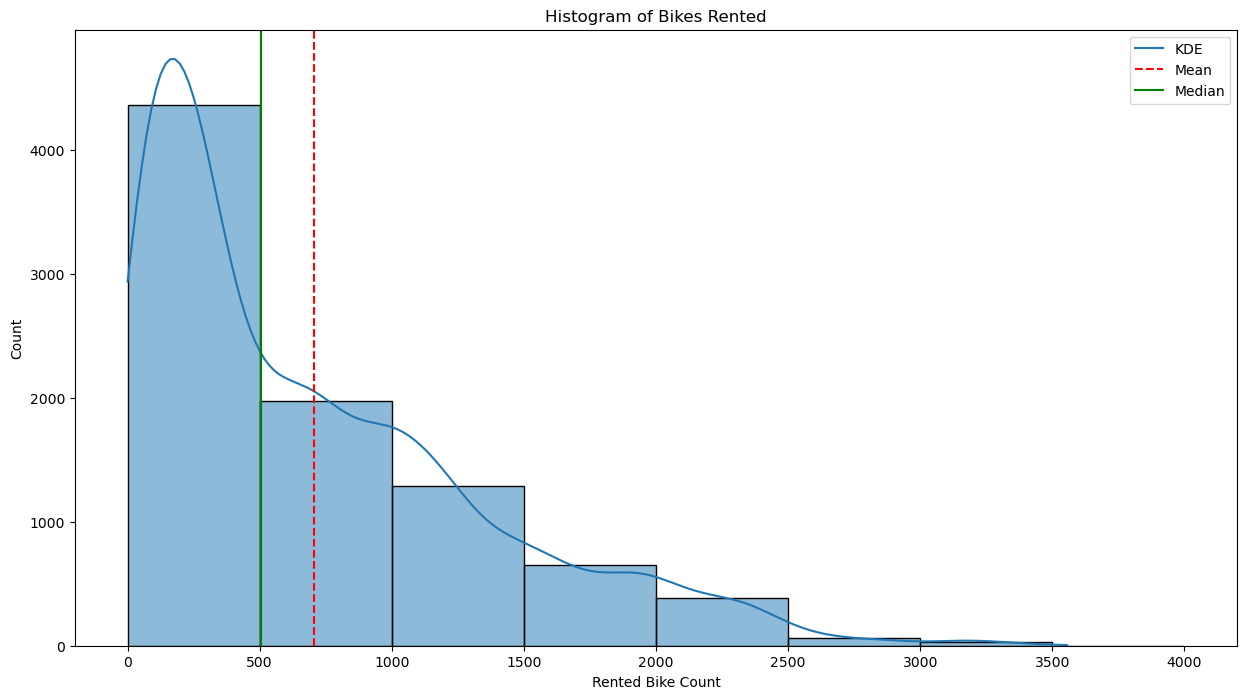

In [10]:
# histogram of the target column
# set plot size
plt.figure(figsize=(15,8))
# histogram using sns with kernel density estimation
sns.histplot(df['Rented Bike Count'], binwidth=500, kde=True)
# add a mean line to the plot
plt.axvline(x=df['Rented Bike Count'].mean(), color='red', linestyle='--')
# add a median line to the plot
plt.axvline(x=df['Rented Bike Count'].median(), color='green')
# set plot title
plt.title('Histogram of Bikes Rented', loc='center')
# add legend to plot
plt.legend(labels=["KDE","Mean","Median"])
# show plot
plt.show()

# Note: Log-Normal Distribution

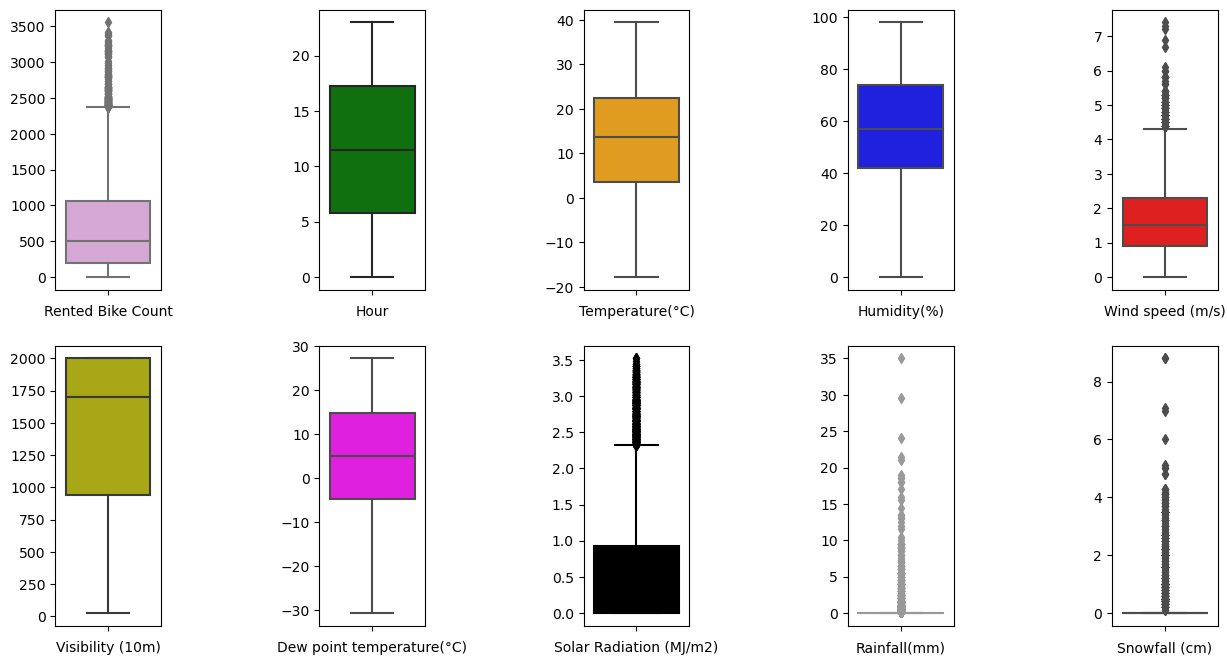

In [11]:
# column list to create a box-plot
box_plot_list = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
                 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
# color pallete list
palette = ['plum', 'g', 'orange', 'b', 'r', 'y', 'magenta', 'black', 'white', 'cyan']

# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# add padding between the subplots
plt.subplots_adjust(wspace=1.5) 
# variable to iterate
col_num = 0
# for loop to iterate over the columns
for row in range(2):
    pal_num = 0
    for col in range(5):
        # draw boxplot for age in the 1st subplot
        sns.boxplot(data=df[box_plot_list[col_num]], ax=ax[row,col], color=palette[col_num])
        # set respective X-axis label
        ax[row,col].set_xlabel(box_plot_list[col_num])
        # remove the unwanted x-axis
        ax[row,col].set_xticklabels([])
        col_num+=1
        pal_num+=1
        
# show the plot
plt.show()

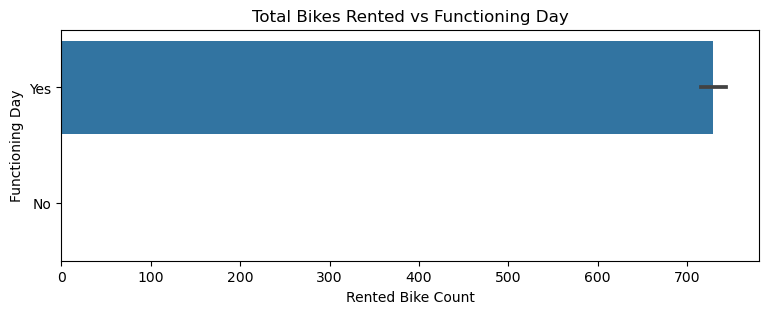

In [12]:
# set plot size
plt.figure(figsize=(9,3))
# Barplot shows Bikes Rented on Functioning Day
sns.barplot(data=df, x='Rented Bike Count', y='Functioning Day')
plt.title("Total Bikes Rented vs Functioning Day")
# show the plot
plt.show()

# Note: 0 bikes rented on No Functioning Day

Shows that bikes are only rented on __Functioning Days__ hence we can drop this column completely

In [13]:
# drop the Functioning Day data and column inplace
df = df.drop(df[df['Functioning Day'] == 'No'].index) 
df.drop(labels=['Functioning Day'], axis=1, inplace=True, errors='ignore')

# Bivariate Analysis

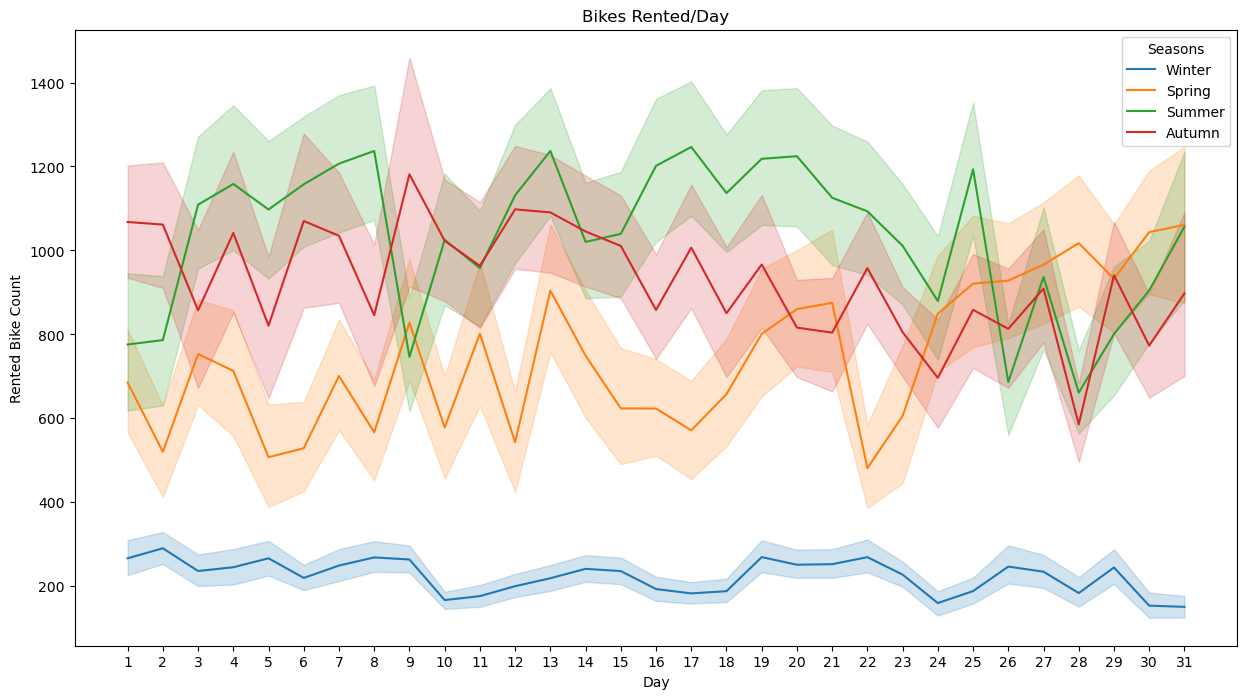

In [14]:
# create temp df with year column for analysis
df_wo_year = df.drop(labels=['Year'], axis=1)
# set plot size
plt.figure(figsize=(15,8))
# lineplot for Bikes Rented per Day
sns.lineplot(data=df_wo_year, x='Day', y='Rented Bike Count', hue='Seasons')
# set x-axis to cover all days
plt.xticks(ticks=df_wo_year['Day'].unique())
plt.title("Bikes Rented/Day")
# show plot
plt.show()

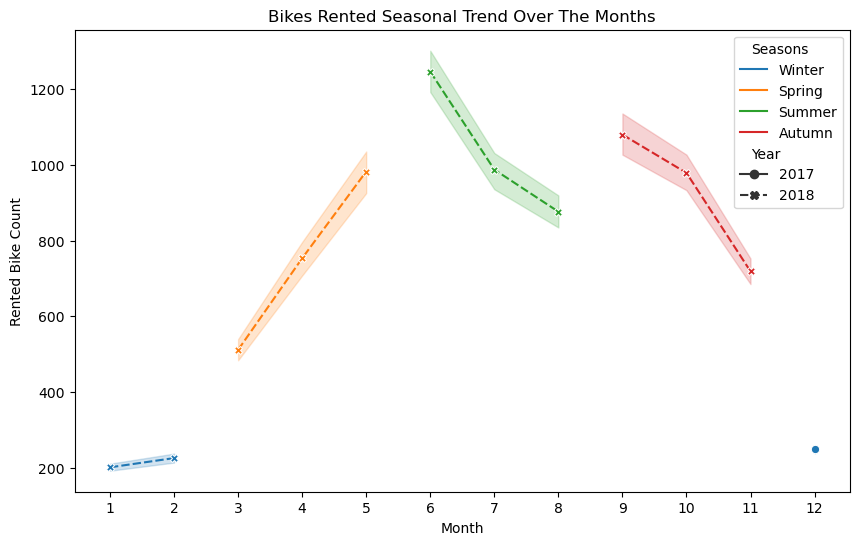

In [15]:
# set plot size
plt.figure(figsize=(10,6))
# lineplot for Seasonal and Yearly trend comparison with Bikes Rented
sns.lineplot(data=df, x='Month', y='Rented Bike Count', hue='Seasons', style='Year', markers=True)
# show all months on x-axis
plt.xticks(ticks=df['Month'].unique())
# set plot title
plt.title("Bikes Rented Seasonal Trend Over The Months")
# show plot
plt.show()

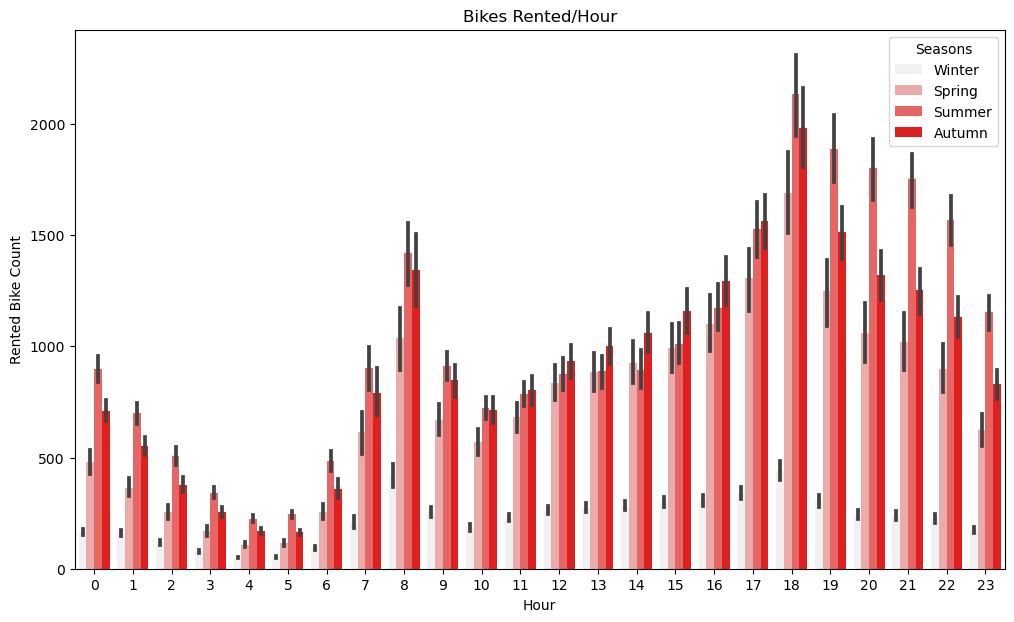

In [16]:
# set plot size
plt.figure(figsize=(12,7))
# barplot to compare Hours vs Bikes Rented
sns.barplot(data=df, y='Rented Bike Count', x='Hour', hue='Seasons', color='red')
# show all hour on x-axis
plt.xticks(ticks=df['Hour'].unique())
# set plot title
plt.title("Bikes Rented/Hour")
# show the plot
plt.show()

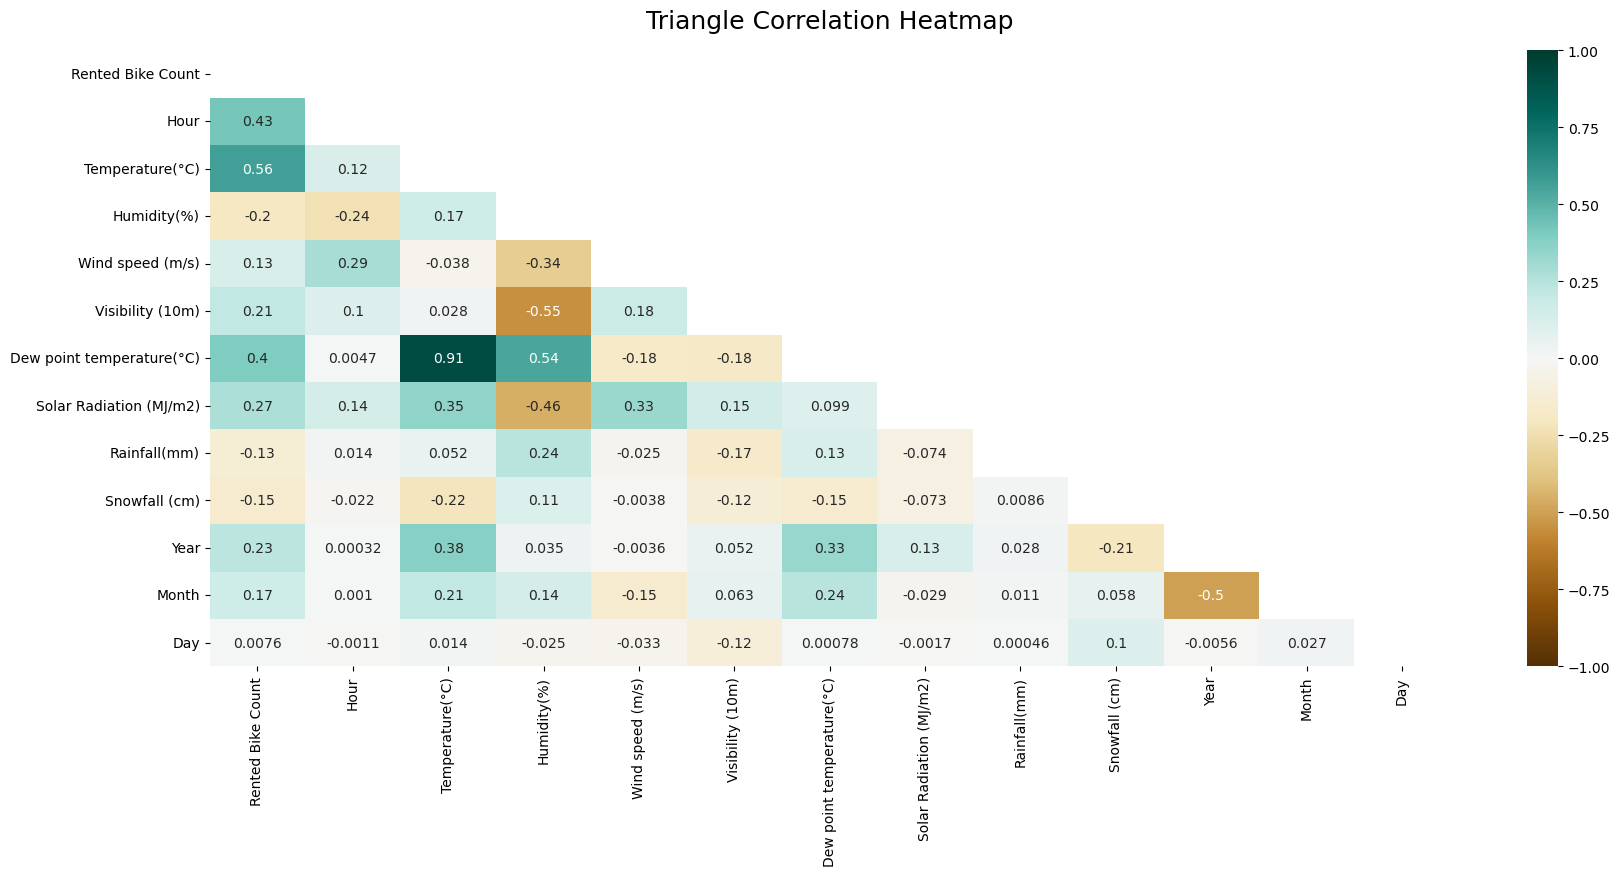

In [17]:
# set plot size
plt.figure(figsize=(20, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))
# set heatmap using sns
heatmap = sns.heatmap(df.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# set heatmap plot title
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
# show the plot
plt.show()

In [18]:
# drop the 'Dew Point Temperature' column due to multi-collinearity issue
df.drop(labels=['Dew point temperature(°C)'], axis=1, inplace=True, errors='ignore')

# Observation
__Dew point temperature(°C)__ and __Temperature(°C)__ are highly correlated causing multi-collinearity issue so we will drop the one column that is less correlated with the target variable __Rented Bike Count__ that is __Dew point temperature(°C)__

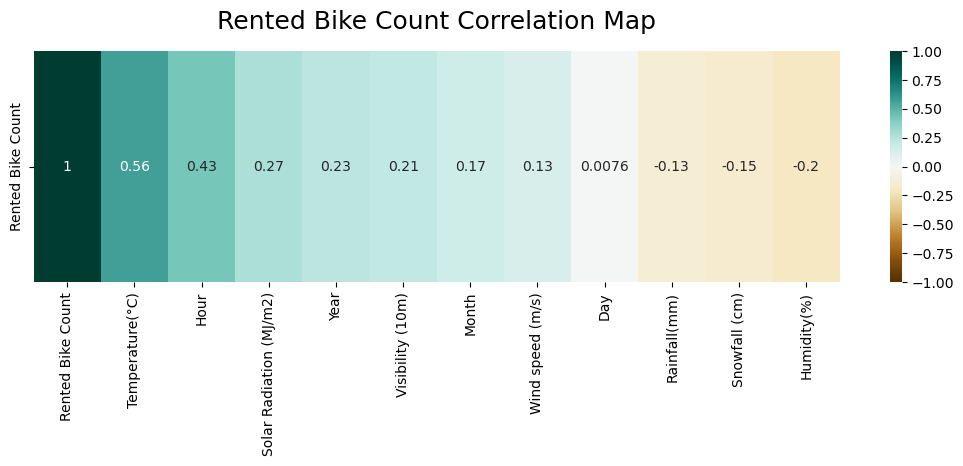

In [19]:
# set plot size
plt.figure(figsize=(13, 3))
# create correlation matrix with 'Rented Bike Count' column in descending order
corr_map = df.corr(numeric_only=True)[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False)
# plot heatmap of the correlation matrix using sns heatmap() function
heatmap = sns.heatmap(corr_map.T, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# set title of the plot
heatmap.set_title('Rented Bike Count Correlation Map', fontdict={'fontsize':18}, pad=16)
# show the plot
plt.show()

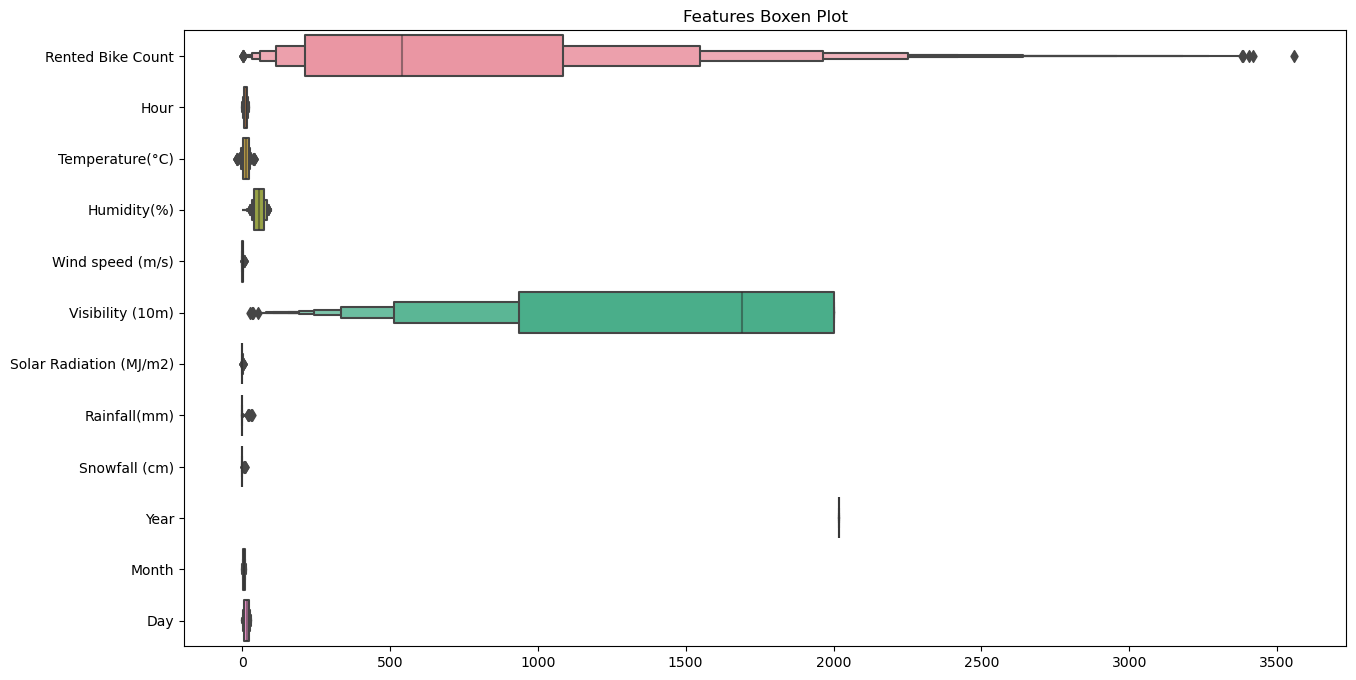

In [20]:
# set plot size
plt.figure(figsize=(15,8))
# boxenplot of df
sns.boxenplot(df, orient='h')
# set plot title
plt.title("Features Boxen Plot")
# show the plot
plt.show()

# Note: 

1. Rented Bike Count: Right Skewed

2. Temperature is Gaussian Distributed (Normal Distribution)

3. Visibility: Left Skewed

4. Solar Radiation: Right Skewed

5. Most of the features are skewed

In [21]:
# function to plot histogram and QQ plot of the given column
def plotvariable(df, column):
    # set figure size of the plot
    plt.figure(figsize=(10,4))
    # set index of subplot
    plt.subplot(1,2,1)
    # plot the histogram
    sns.histplot(df[column], bins=30, kde=True)
    # set index of subplot
    plt.subplot(1,2,2)
    # plot the QQ plot of given column vs Normal Distribution
    probplot(df[column], dist='norm', plot=plt)
    # show the plot
    plt.show()

In [22]:
# encode data using Label Encoder
df = df.apply(LabelEncoder().fit_transform)

# Note: Label Encoder preserves dimensionality compared to One Hot Encoding which increases it

In [23]:
# column list which needs to be transformed for better fit
col_to_trans = ['Rented Bike Count', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)']  

Original Data without any tranformation


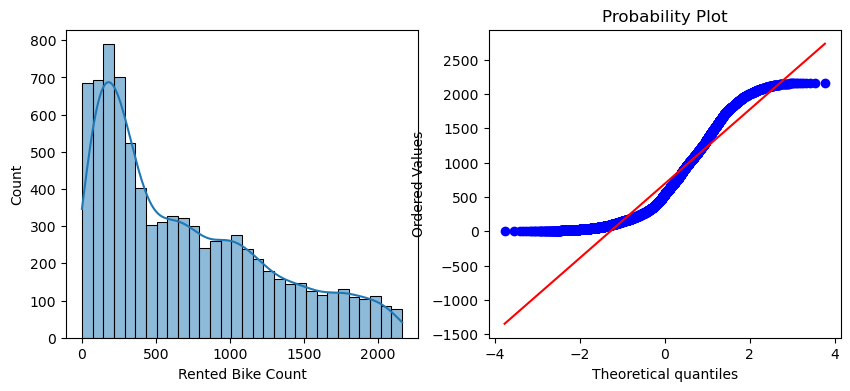

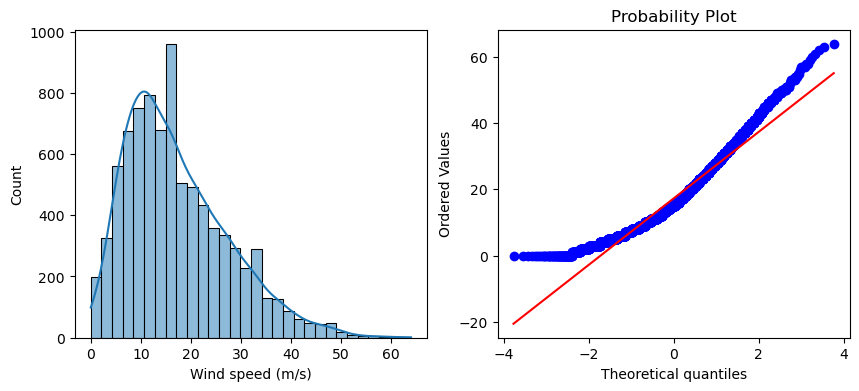

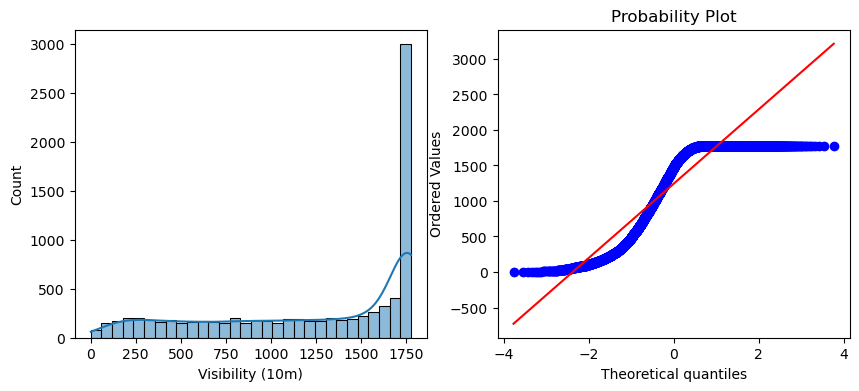

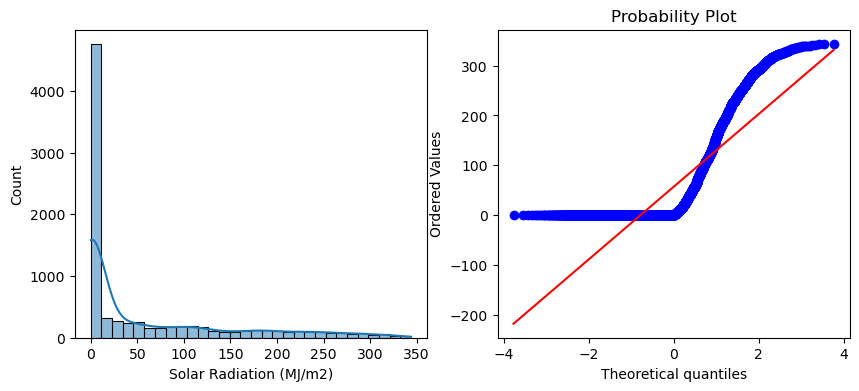

In [24]:
# plot distribution for original data
print("Original Data without any tranformation")
for col in col_to_trans:
    # plot the Histogram and its respective QQ plot
    plotvariable(df, col)

Box Cox Transformed Data


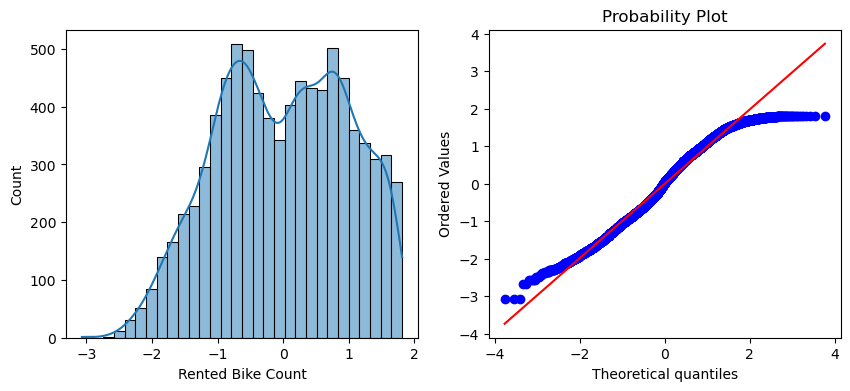

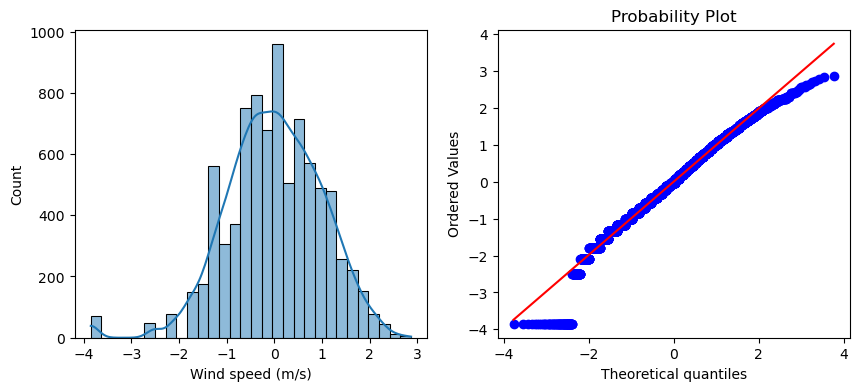

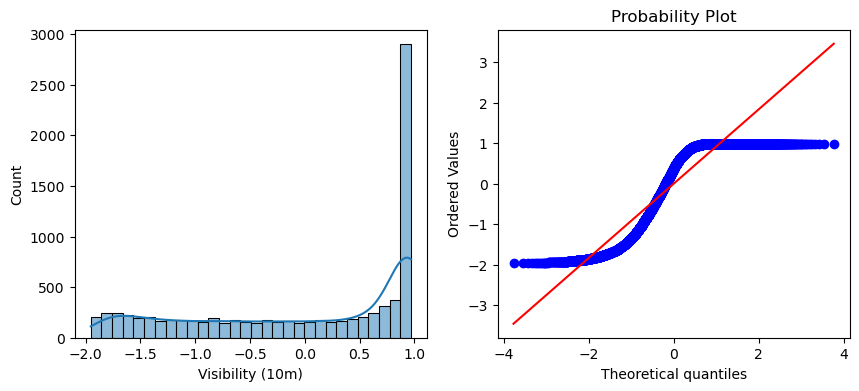

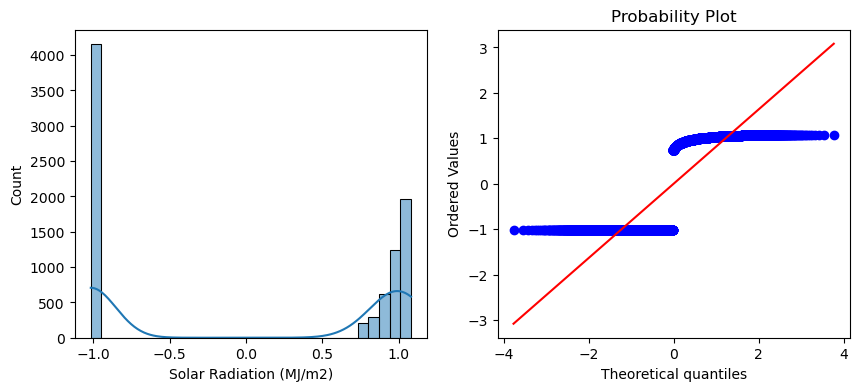

In [25]:
# plot distribution for Power Transform i.e. Box-Cox transformed data
print("Box Cox Transformed Data")
bc_df = df[col_to_trans].copy()
for col in col_to_trans:
    # convert the column data using power_transform() function
    # adding the constant because box-cox cannot work with 0 or negative values
    bc_df[col] = power_transform(bc_df[[col]]+0.00000000000001, method='box-cox')
    plotvariable(bc_df, col)

Square Root Transformation


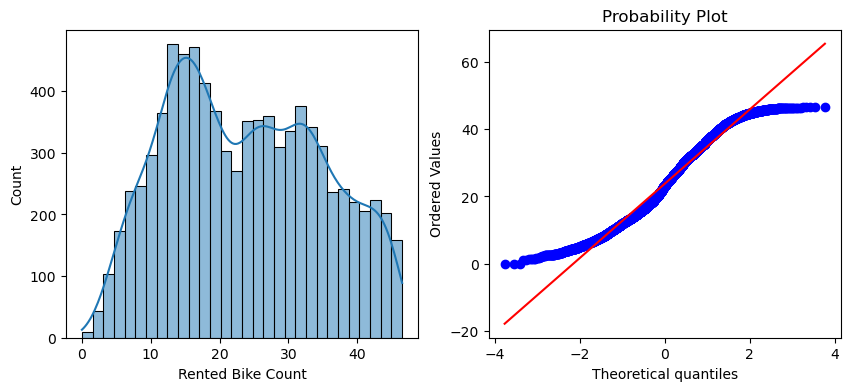

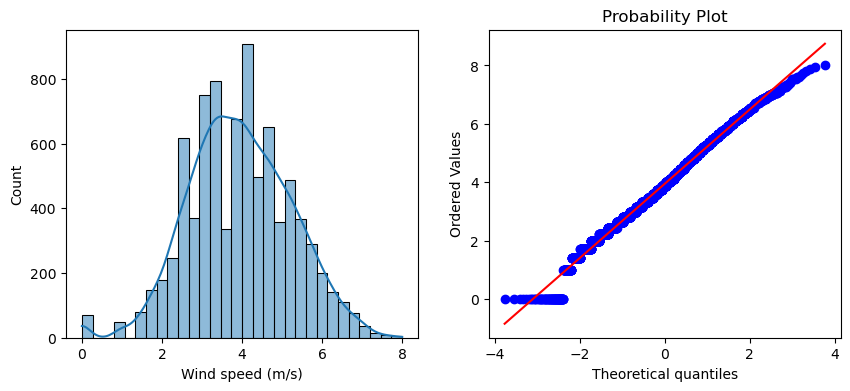

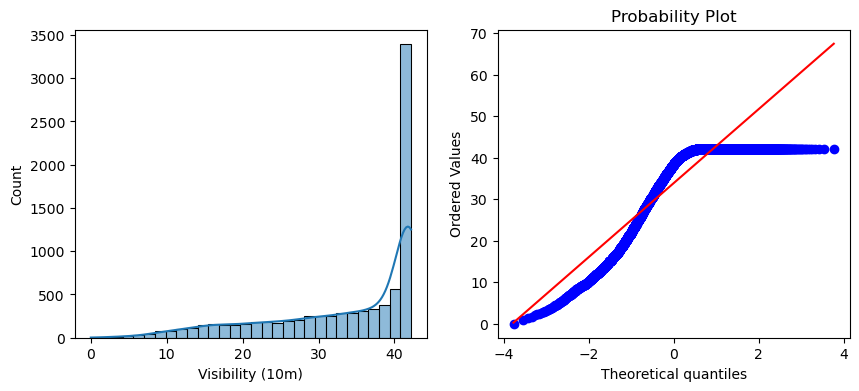

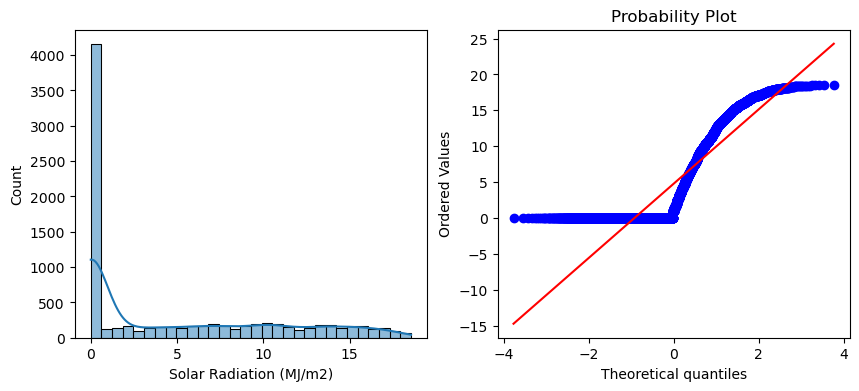

In [26]:
# plot distribution of Square Root transformed data
print("Square Root Transformation")
sqrt_df = df[col_to_trans].copy()
for col in col_to_trans:
    # convert the column data by taking square root of the data
    sqrt_df[col] = np.sqrt(sqrt_df[col])
    plotvariable(sqrt_df, col)

# We can use either of the transformations Square_Root or Power-Transform i.e. Box-Cox Transform

In [27]:
# transfer columns from box-cox transformed df to original df
df[col_to_trans] = sqrt_df[col_to_trans]

In [28]:
# import Sci-kit learn stack
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import LinearSVR, SVR
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [29]:
# separate the features and target variable
feat = df.drop(labels=['Rented Bike Count'], axis=1)
targ = df['Rented Bike Count']

In [30]:
# custom function to split, train and test the data using Robust Scaler as default
def train_predict_score(model, scaler, X, y):
    # Scale the data using Robust and user-input scaler
    rs = RobustScaler()
    X = scaler.fit_transform(rs.fit_transform(X))
    
    #split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=68)

    # predict on test set after training
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # plot the data 
    plt.scatter(x = y_pred, y = y_test, color='crimson')
    # set plot title
    plt.title(f"{model.__class__.__name__} Predicted VS Actual")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # print different metrics
    print(f"R^2: {model.score(X_test, y_test)*100}%")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
    
    # show the plotted graph
    plt.show()

# Note

1. Standard Scaler does not guarantee balanced feature scales, due to the influence of the outliers which leads to the shrinkage in the range of the feature values

2. Robust Scaler scales the data using the interquartile ranges and help adapt the outliers hence we used it as default first scaler in the custom function

R^2: 66.53154189979328%
MSE: 41.11717047892424
RMSE: 6.412267187112858


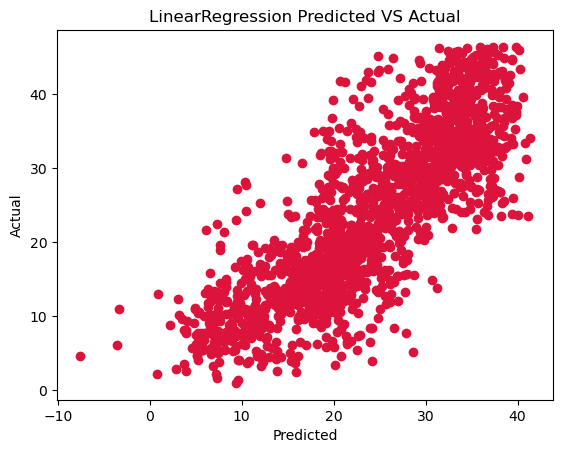

In [31]:
# Linear Regression Model
train_predict_score(LinearRegression(), StandardScaler(), feat, targ)

R^2: 74.57417843179195%
MSE: 31.236510413972784
RMSE: 5.588963268261188


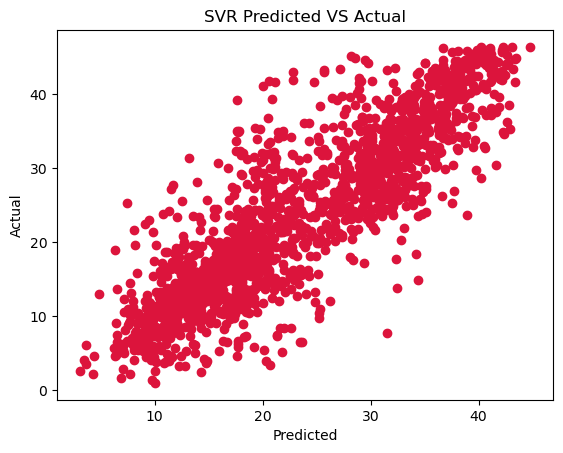

In [32]:
# Random Forest Regressor
train_predict_score(SVR(), MinMaxScaler(), feat, targ)

R^2: 91.0573996127177%
MSE: 10.986297114371963
RMSE: 3.314558358872561


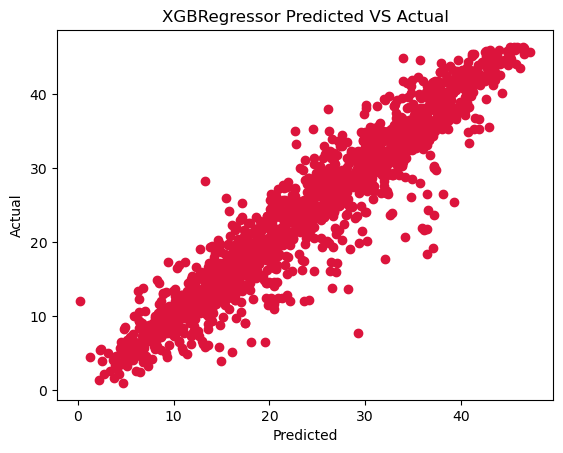

In [33]:
# Random Forest Regressor
train_predict_score(XGBRegressor(random_state=68), MinMaxScaler(), feat, targ)

In [34]:
# All linear models name and respective instance list
CLASSIFIERS = [['LinearRegression', LinearRegression()], 
               ['Lasso', Lasso()],
               ['Ridge', Ridge()],
               ['KNeighborsRegressor', neighbors.KNeighborsRegressor()],
               ['SVR' , SVR(kernel='rbf')],
               ['DecisionTree', DecisionTreeRegressor(random_state=68)],
               ['RandomForest', RandomForestRegressor(random_state=68)],
               ['ExtraTreeRegressor', ExtraTreesRegressor(random_state=68)],
               ['GradientBoostingRegressor', GradientBoostingRegressor(random_state=68)],
               ['XGBRegressor', XGBRegressor(random_state=68)] ,
               ['MLPRegressor', MLPRegressor(activation='logistic', solver='sgd', 
                                               learning_rate='adaptive', max_iter=1000, learning_rate_init=0.01, alpha=0.01)]]

In [35]:
# Scale the data using Robust and Standard Scaler
X = StandardScaler().fit_transform(RobustScaler().fit_transform(feat))

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(feat, targ, train_size=0.80, random_state=68)

In [36]:
# loop to train, test and predict and compare scores for all linear models
model_data_list = []
for name, model in CLASSIFIERS:
    # dictionary to store each models data
    model_data = dict()
    # set name for given model
    model_data["Name"] = name
    # set randome state
    model.random_state = 68
    
    # record training start time
    start = time.time()
    # fit the model on train set
    model.fit(X_train, y_train)
    #record training done time
    end = time.time()
    
    # model training time calculation
    model_data["Train_Time"] = end - start
    # Training R2 Score
    model_data["Train_R2_Score"] = r2_score(y_train, model.predict(X_train))*100
    # Training R2 Score
    model_data["Test_R2_Score"] = r2_score(y_test, model.predict(X_test))*100
    # Model RMSE
    model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    # store current model data to the list
    model_data_list.append(model_data)

In [37]:
# all models data df
model_frame = pd.DataFrame(model_data_list)
model_frame

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression,0.008586,64.527552,66.531542,6.412267
1,Lasso,0.002876,63.366060,65.476339,6.512567
2,Ridge,0.000000,64.527549,66.531118,6.412308
3,KNeighborsRegressor,0.000000,84.642290,77.655215,5.239404
4,SVR,1.513583,61.065102,62.689091,6.770359
5,DecisionTree,0.046875,100.000000,80.379365,4.909647
6,RandomForest,2.515625,98.528716,90.443794,3.426388
7,ExtraTreeRegressor,1.234375,100.000000,90.675121,3.384662
8,GradientBoostingRegressor,0.625369,88.848928,88.269310,3.796256
9,XGBRegressor,0.140613,98.043511,91.055871,3.314842
